c:\
c:\
0 train acc, test acc|0.09863333333333334,0.0958
600 train acc, test acc|0.9171,0.9215
1200 train acc, test acc|0.9271833333333334,0.9291
1800 train acc, test acc|0.9500666666666666,0.9474
2400 train acc, test acc|0.9587666666666667,0.9543
3000 train acc, test acc|0.9654166666666667,0.961
3600 train acc, test acc|0.9700333333333333,0.9644
4200 train acc, test acc|0.9738666666666667,0.9674
4800 train acc, test acc|0.9778833333333333,0.97
5400 train acc, test acc|0.97955,0.9709
6000 train acc, test acc|0.98185,0.9721
6600 train acc, test acc|0.98185,0.9723
7200 train acc, test acc|0.9852333333333333,0.9733
7800 train acc, test acc|0.9866333333333334,0.9755
8400 train acc, test acc|0.9866833333333334,0.9759
9000 train acc, test acc|0.9873833333333333,0.9745
9600 train acc, test acc|0.9903666666666666,0.9762
10200 train acc, test acc|0.99025,0.9759
10800 train acc, test acc|0.9912833333333333,0.9775
11400 train acc, test acc|0.9922833333333333,0.9779
12000 train acc, test acc|0.993

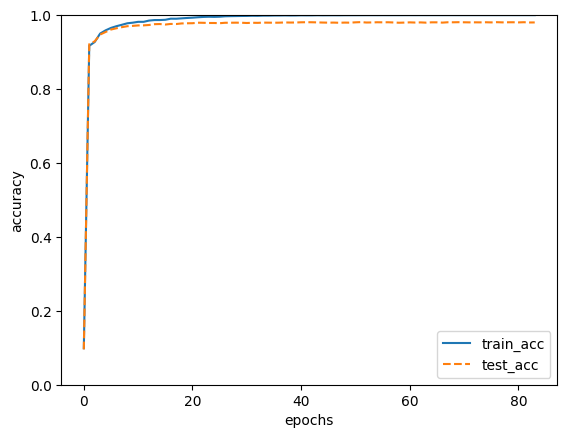

In [23]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch03.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=350, output_size=10)

iters_num = 50000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.75

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # grad = network.gradient(x_batch, t_batch)
    grad = network.numerical_gradient(x_batch, t_batch)


    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(i, "train acc, test acc|" + str(train_acc) + "," +str(test_acc))

markers = {'train': 'o','test': 's'}

x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label = 'train_acc')
plt.plot(x, test_acc_list, label = 'test_acc', linestyle = '--')
plt.xlabel('epochs')
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc= 'lower right')
plt.show()


